# Renault car sequencing II -- greedy

Version 18/05/23

https://www.roadef.org/challenge/2005/en/

Wir importieren ein paar Pakete. (Nicht alle brauchen wir hier.) 
<ul>
    <li><code>numpy</code>: wissenschaftliche Bibliothek, im wesentlichen für die array-Klasse</li>
    <li><code>matplotlib</code>: Visualisierungsfunktionen</li>
    <li><code>math</code>: mathematische Funktionen</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

plt.style.use("seaborn-v0_8")  ## plots sehen so ein bisschen schöner aus

Als nächstes werden die Instanzdaten gelesen und eine Bibliothek (<code>rnlt</code>, kurz für *Renault*) mit Hilfscode (data handling und Visualisierung) importiert. Weiterhin werden die Instanzdaten und <code>rnlt</code> automatisch heruntergeladen -- dies funktioniert so wie es dort steht unter Google Colab und unter Linux (evtl auch iOs). Wenn Sie den Code auf einem Windows-Rechner lokal ausführen wollen, dann laden Sie die Instanzdaten unter (https://www.roadef.org/challenge/2005/files/Instances_set_A.zip)(https://www.roadef.org/challenge/2005/files/Instances_set_A.zip) herunter, dann entpacken Sie die Daten und speichern Sie die Daten und <code>rnlt.py</code> im gleichen Ordner wie dieses juypter-Notebook. Weiterhin müssen Sie die ersten drei Zeilen auskommentieren.

In [2]:
!wget -q https://www.roadef.org/challenge/2005/files/Instances_set_A.zip
!unzip -q Instances_set_A.zip
!wget -q https://raw.githubusercontent.com/henningbruhn/mobp/main/sequencing_aufgabe/rnlt.py

# Pfad zu den gespeicherten Instanzen -- ersetzen Sie das evtl durch den entsprechenden Pfad bei Ihnen
#path="RENAULT/Instances_set_A/"   
path="Instances/"

import rnlt

Wir laden wieder alle Instanzen in das dictionary <code>data_dict</code> ein.

In [3]:
data_dict=rnlt.read_in_all_instances(path)

Folgende Instanzen wurden eingelesen: 
  039_38_4_EP_RAF_ch1
  024_38_3_EP_ENP_RAF
  048_39_1_EP_ENP_RAF
  025_38_1_EP_ENP_RAF
  064_38_2_EP_RAF_ENP_ch1
  064_38_2_RAF_EP_ENP_ch2
  022_3_4_EP_RAF_ENP
  048_39_1_EP_RAF_ENP
  024_38_5_EP_RAF_ENP
  039_38_4_RAF_EP_ch1
  024_38_3_EP_RAF_ENP
  025_38_1_EP_RAF_ENP
  064_38_2_EP_RAF_ENP_ch2
  064_38_2_RAF_EP_ENP_ch1
  022_3_4_RAF_EP_ENP
  024_38_5_EP_ENP_RAF


## Zielfunktion, Kosten

Bewertet werden soll eine Reihung der Fahrzeuge, und zwar nach den von Renault vorgegebenen Regeln. Als Reihung wird einfach eine Liste
der Fahrzeuge erwartet.

In [4]:
sample_instance=data_dict['048_39_1_EP_RAF_ENP']

Hier ist eine einfache Methode, die überprüft, ob auch tatsächlich alle Fahrzeug zugeordnet wurden. (Man kein leicht niedrige Kosten erreichen, in dem ein Teil der Fahrzeuge einfach weggelassen wird...)

In [5]:
### wir testen die Methode gleich anhand der Reihung von Renault
renault_schedule=sample_instance['renault_schedule']
rnlt.check_for_completeness(renault_schedule,sample_instance)

Reihung vollständig!


True

Die Zielfunktion ist ein wenig komplizierter. Wichtig ist im Folgenden <code>compute_objective</code>, die eigentliche Zielfunktion.

In [6]:
rnlt.compute_objective(renault_schedule,sample_instance)

35181855.0

Wir können uns auch die einzelnen Komponenten, die in die Zielfunktion einfließen, aufschlüsseln lassen:

In [7]:
rnlt.compute_scores(renault_schedule,sample_instance)

{'HPRC1': 1.0,
 'HPRC2': 0.0,
 'HPRC3': 0.0,
 'HPRC4': 33.0,
 'HPRC5': 1.0,
 'LPRC1': 44.0,
 'LPRC2': 8.0,
 'LPRC3': 15.0,
 'LPRC4': 40.0,
 'LPRC5': 18.0,
 'LPRC6': 29.0,
 'LPRC7': 3.0,
 'LPRC8': 87.0,
 'LPRC9': 200.0,
 'LPRC10': 101.0,
 'LPRC11': 238.0,
 'LPRC12': 72.0,
 'colour': 181}

## Visualisierung

Visualisierung ist wichtig. Sie hilft zu verstehen, was die Algorithmen machen und wo angesetzt werden kann, um sie zu verbessern.
Mit <code>plot_options_and_colours</code> können Sie sich anzeigen lassen, wo Farbwechsel und p/q-Verletzungen auftreten. Wir machen das gleich einmal mit der Reihung, die Renault errechnet hat.

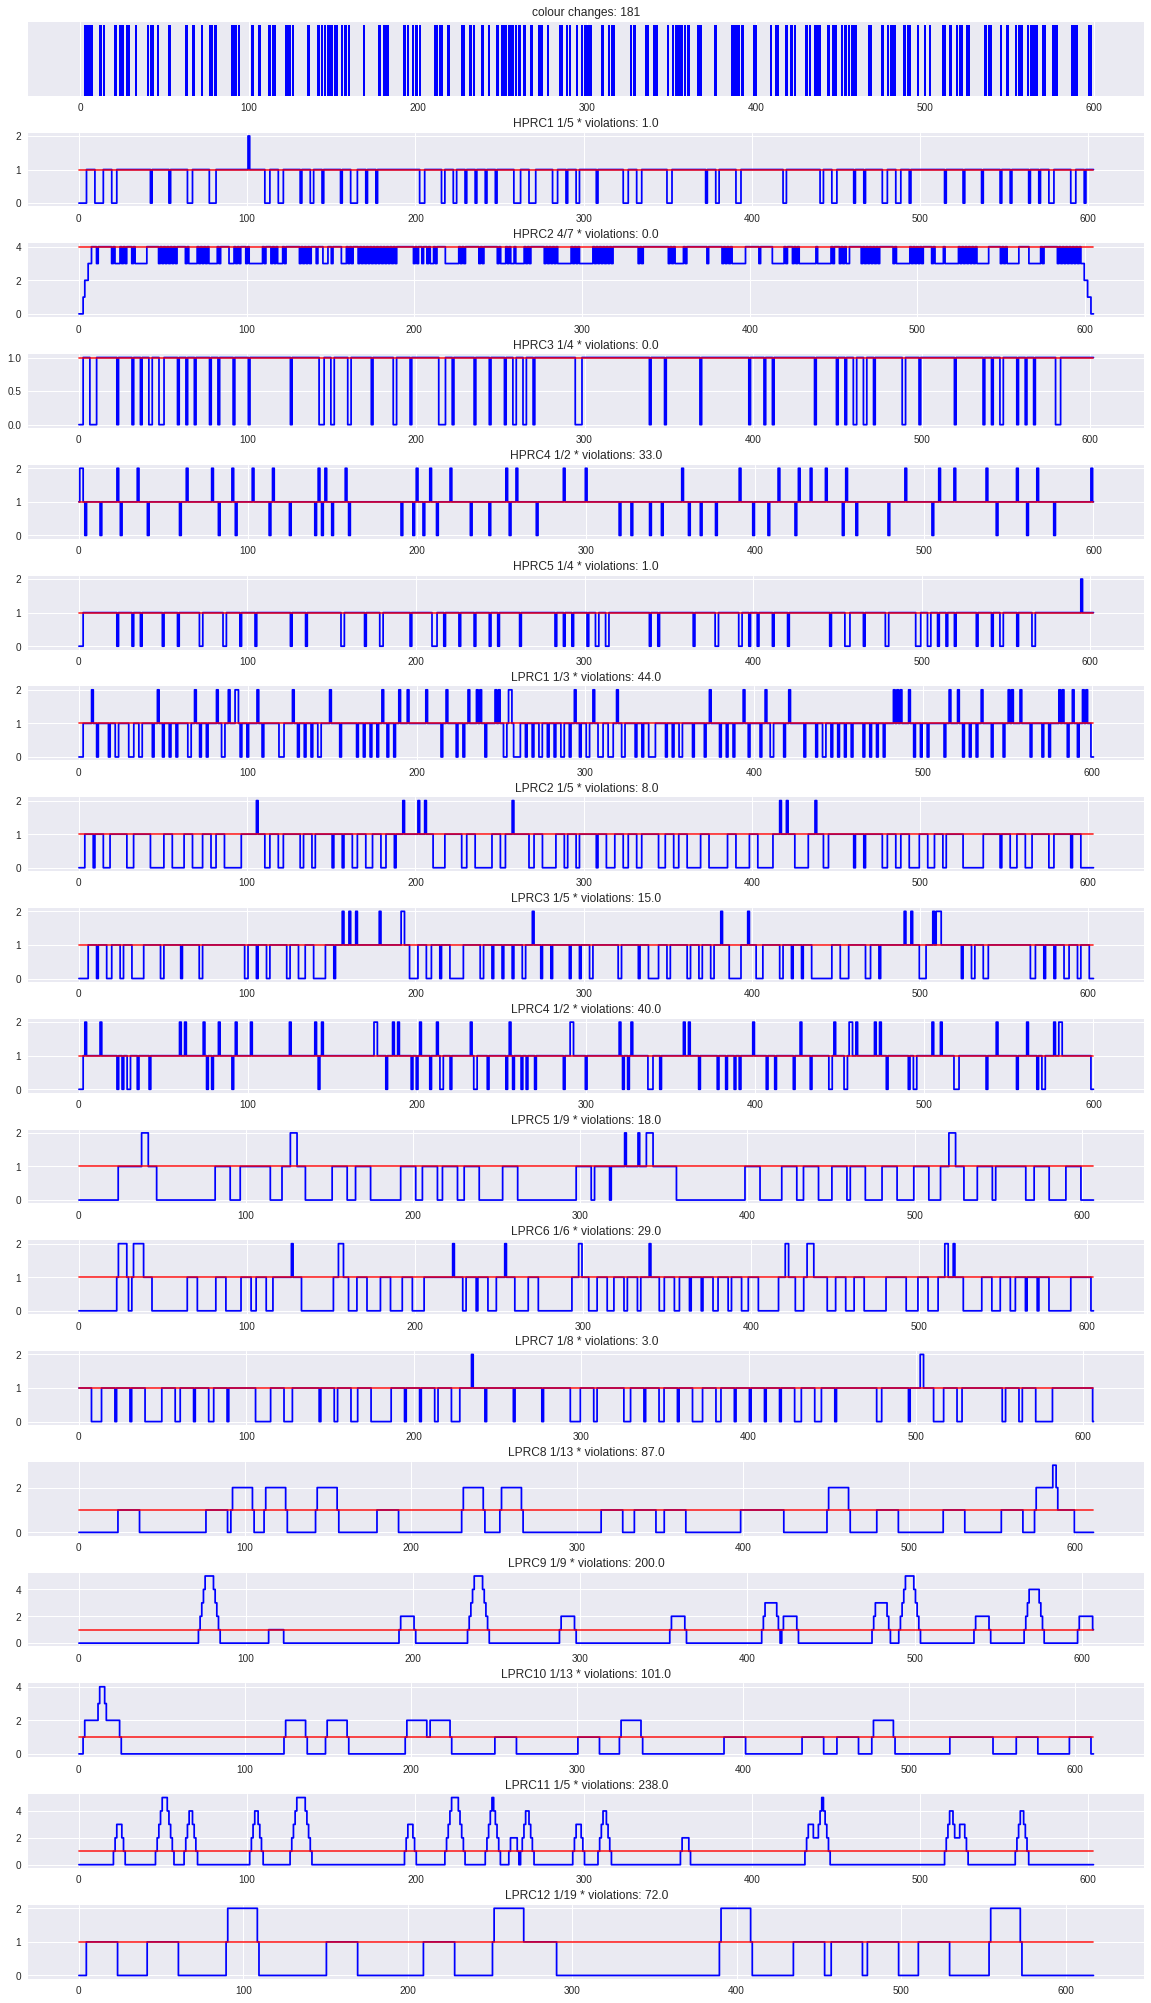

In [8]:
rnlt.plot_options_and_colours(renault_schedule,sample_instance)

Wir vergleichen die Renault-Lösung mit einer zufälligen Reihenfolge. Hier hift die Funktion <code>random.permutation</code> aus dem <code>numpy</code>-Paket.

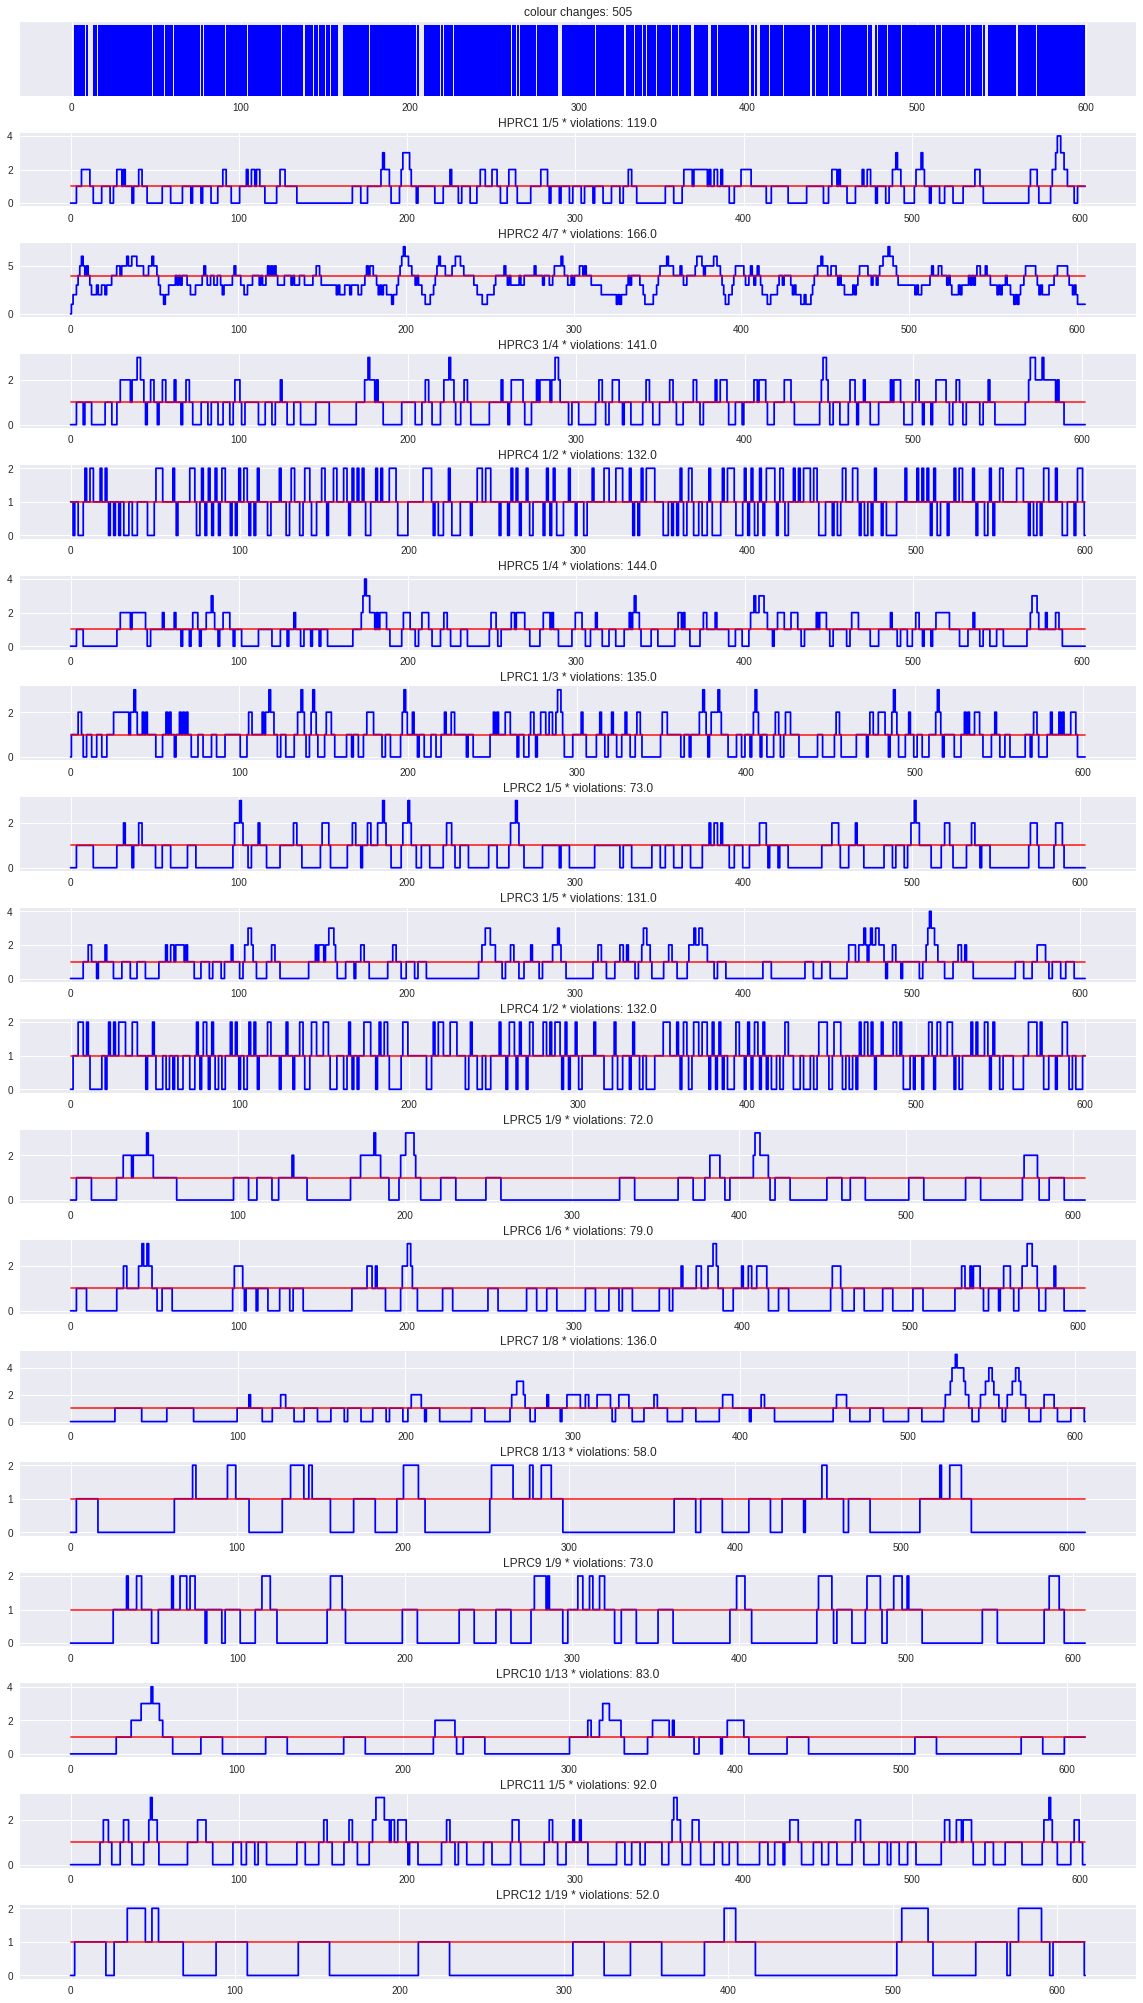

In [9]:
rnd_schedule=np.random.permutation(sample_instance['current_day'])
rnlt.plot_options_and_colours(rnd_schedule,sample_instance)

Wir vergleichen auch die Zielfunktionswerte. Natürlich ist die Renault-Lösung deutlich besser als die Zufallsreihung.

In [10]:
rnlt.compute_objective(renault_schedule,sample_instance),rnlt.compute_objective(rnd_schedule,sample_instance)

(35181855.0, 702506116.0)

## 2. Aufgabe: Zufallsreihungen

Bei manchen Problemen reicht es, eine Reihe von Zufallslösungen zu erzeugen und die beste auszuwählen. Implementieren Sie diese Methode und testen Sie Sie anhand der <code>sample_instance</code>.

In [12]:
def best_random_schedule(instance,tries=10):
    best_schedule=None
    best_cost=np.inf
    for _ in range(tries):
        ### fügen Sie Ihren Code hier ein ###
        rnd_schedule=np.random.permutation(sample_instance['current_day'])
        cost=rnlt.compute_objective(rnd_schedule,instance)
        if cost<best_cost:
            best_schedule=rnd_schedule
            best_cost=cost
        ### Ende Einfügung ###
    return best_schedule,best_cost

tries=100
rnd_sch,best_cost=best_random_schedule(sample_instance,tries=tries)
print("Niedrigste Kosten nach {} Versuchen: {}".format(tries,best_cost))

Niedrigste Kosten nach 100 Versuchen: 680509191.0


Wenn Sie Zeit haben, modifizieren Sie die Funktion <code>best_random_schedule</code>, so dass sie zusätzlich die niedrigsten Kosten in der jeweiligen Iteration zurück gegeben werden. So können wir beurteilen, nach welcher Zeit eine weitere Verbesserung gefunden wird. In dem Visualisierungscode unten wird die Kurve mit der Renault-Lösung verglichen. Besteht Hoffnung, dass eine gute Lösung gefunden wird, wenn einfach für, sagen wir, 10mins Zufallslösungen gesucht werden? 

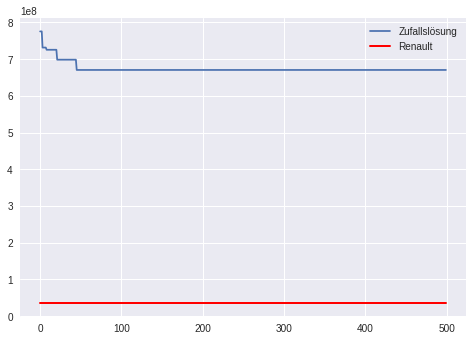

In [13]:
def best_random_schedule(instance,tries=10):
### Fügen Sie Ihren Code hier ein ###
    best_schedule=None
    best_cost=np.inf
    records=[]
    for _ in range(tries):
        rnd_schedule=np.random.permutation(sample_instance['current_day'])
        cost=rnlt.compute_objective(rnd_schedule,instance)
        if cost<best_cost:
            best_schedule=rnd_schedule
            best_cost=cost
        records.append(best_cost)
### Ende Einfügung ###
    return best_schedule,best_cost, records 

sch,cost,records=best_random_schedule(sample_instance,tries=500)
plt.plot(records,label="Zufallslösung")
renault_cost=rnlt.compute_objective(renault_schedule,sample_instance)
plt.plot([renault_cost]*len(records),"r",linewidth=2,label="Renault")
plt.legend()

Wenn Sie die Zeit haben, vergleichen Sie die jeweilige Renault-Lösung mit den Zufallslösungen bei allen Instanzen. 

In [15]:
### Fügen Sie Ihren Code hier ein ###
results=[]
for key in data_dict.keys():
    instance=data_dict[key]
    _,cost,_=best_random_schedule(instance,tries=50)
    renault=instance['renault_schedule']
    renault_cost=rnlt.compute_objective(renault,instance)
    results.append((key,cost,renault_cost))
    
for name,cost,renault_cost in results:
    print("{:23} Zufallslsg: {:13} ** Renault: {:13}".format(name,cost,renault_cost))

039_38_4_EP_RAF_ch1     Zufallslsg: 15492515000.0 ** Renault:    76228000.0
024_38_3_EP_ENP_RAF     Zufallslsg:  5326032510.0 ** Renault:    80075463.0
048_39_1_EP_ENP_RAF     Zufallslsg:   703135501.0 ** Renault:    40091333.0
025_38_1_EP_ENP_RAF     Zufallslsg:  2449752496.0 ** Renault:     1997290.0
064_38_2_EP_RAF_ENP_ch1 Zufallslsg:  4708510547.0 ** Renault:      195786.0
064_38_2_RAF_EP_ENP_ch2 Zufallslsg:   523301225.0 ** Renault:    29178060.0
022_3_4_EP_RAF_ENP      Zufallslsg:   503516955.0 ** Renault:       69002.0
048_39_1_EP_RAF_ENP     Zufallslsg:   705509120.0 ** Renault:    35181855.0
024_38_5_EP_RAF_ENP     Zufallslsg:  5328493953.0 ** Renault:    96467092.0
039_38_4_RAF_EP_ch1     Zufallslsg:   503533000.0 ** Renault:    68334000.0
024_38_3_EP_RAF_ENP     Zufallslsg:  5325507002.0 ** Renault:    70362204.0
025_38_1_EP_RAF_ENP     Zufallslsg:  2430540804.0 ** Renault:      291997.0
064_38_2_EP_RAF_ENP_ch2 Zufallslsg: 33252512225.0 ** Renault:       45035.0
064_38_2_RAF

## 3. Aufgabe: Greedy

Wie könnte ein Greedy-Algorithmus hier aussehen? Vervollständigen Sie die Skizze unten und vergleichen Sie die Ergebnisse mit denen der Zufallsreihungen und dem Renault-Algorithmus. Visualisieren Sie einzelne Lösungen des Greedy-Algorithmus. Was fällt auf? 

Reihung vollständig!
Kosten der greedy-Lösung: 447153419.0
Laufzeit: 47.0s


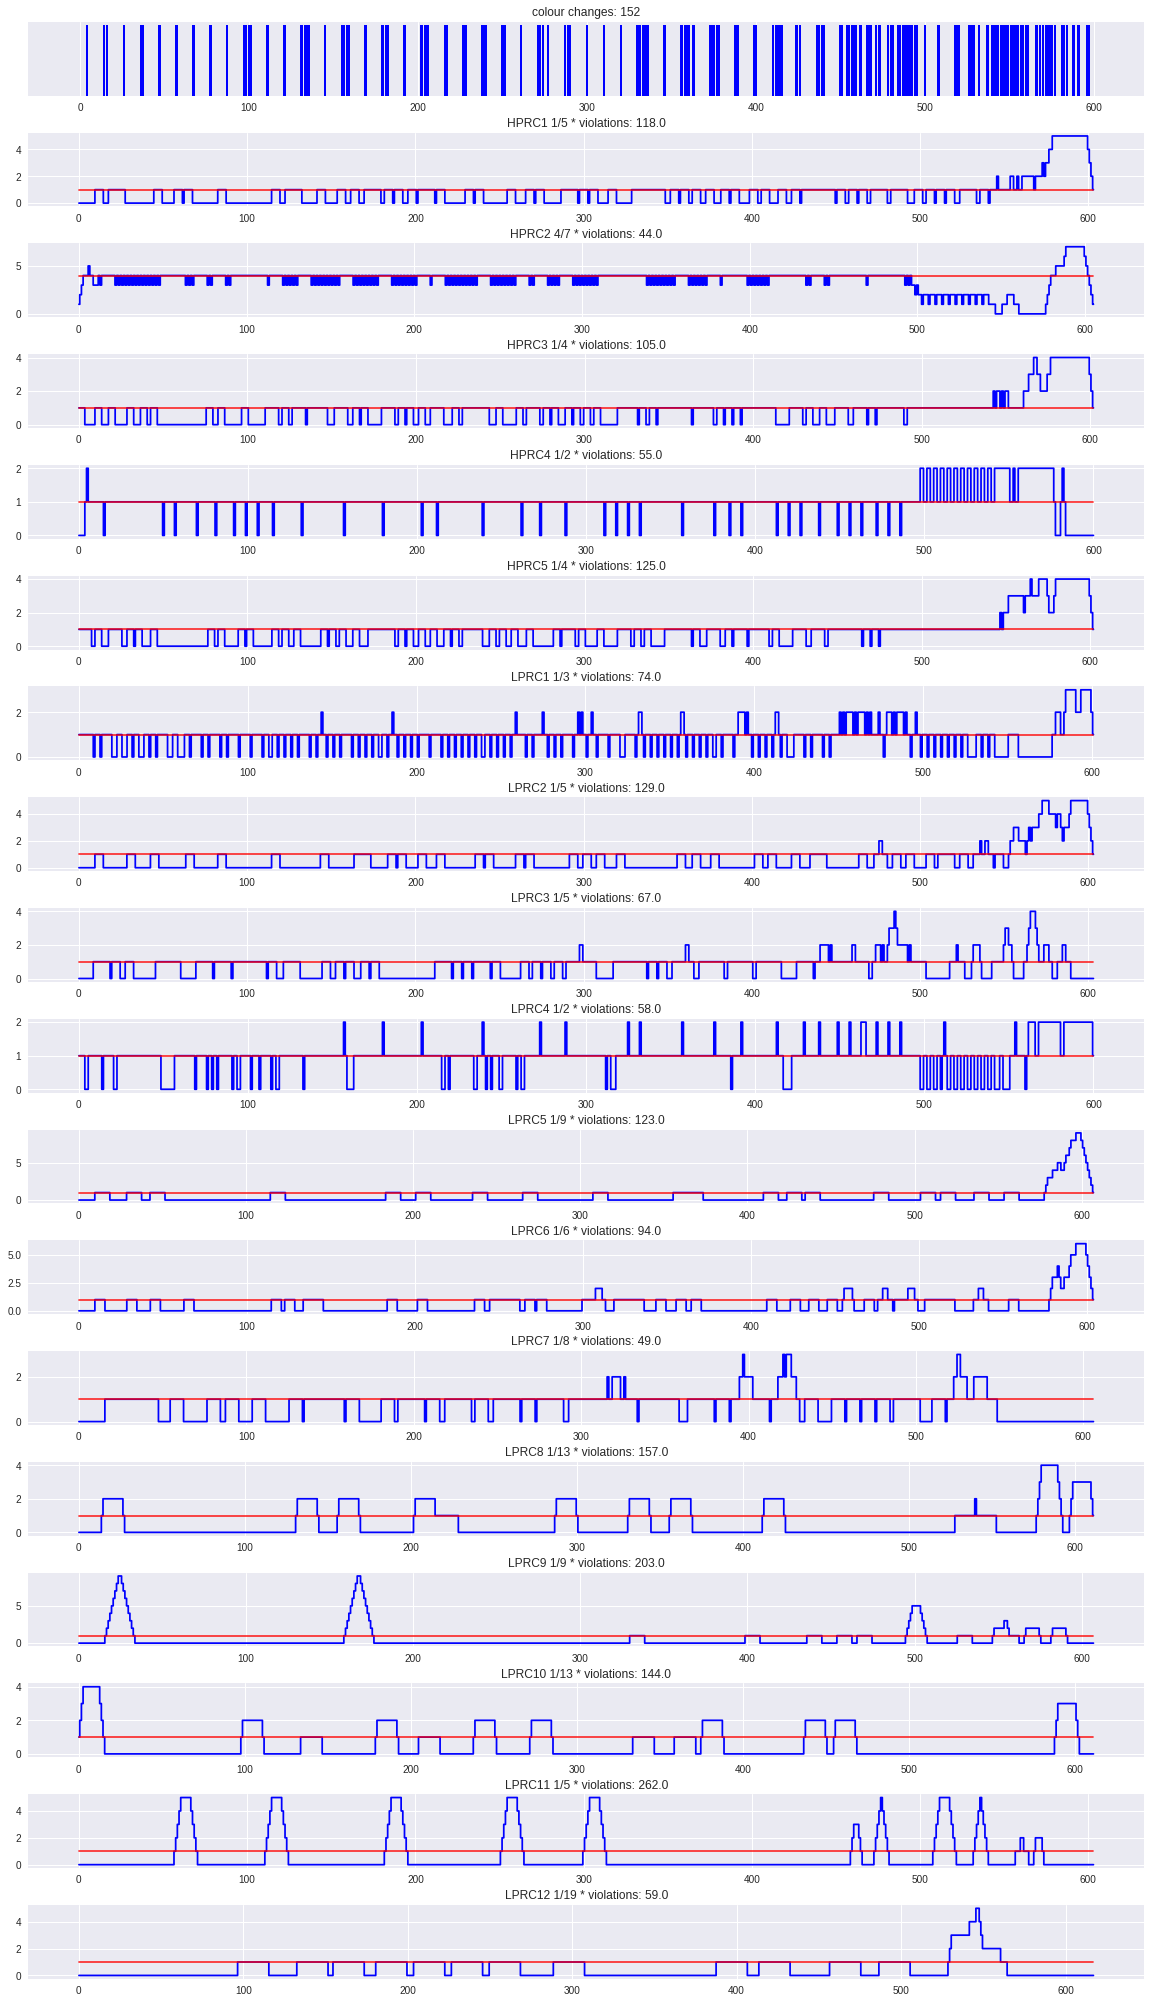

In [16]:
def penalty_increase(next_car,partial_schedule,instance):
    """Um wie viel erhöhen sich die Kosten, wenn next_car als nächstes gereiht wird?"""
    ### Fügen Sie Ihren Code hier ein ###
    partial_schedule.append(next_car)
    ## Um zu sehen, wie die Kosten sich verändern, müssen wie nicht die ganze Reihung 
    ## betrachten -- das Endstück reicht. Wir nehmen hier die letzten 30 Autos. 
    ## Da zu Beginn die Reihung auch weniger als 30 Autos enthalten kann, müssen 
    ## wir ein wenig aufpassen, wie lang das Endstück sein soll
    window_length=min(len(partial_schedule),30)
    cost_increase=rnlt.compute_objective(partial_schedule[-window_length:],instance)
    del partial_schedule[-1]  ## entferne next_car wieder
    ### Ende Einfügung ###
    return cost_increase

def pick_next_greedily(partial_schedule,remaining_cars,instance):
    """finde nächstes Auto für Reihung, das Kosten nur gering erhöht"""
    best_car=None
    best_penalty_increase=np.inf
    for car in remaining_cars:
        ## um wie viel erhöhen sich die Kosten, wenn car als nächstes ausgesucht wird?
        increase=penalty_increase(car,partial_schedule,instance)
        ## wenn besser als bisher bestes, nimm car stattdessen
        if increase<best_penalty_increase:
            best_penalty_increase=increase
            best_car=car
    return best_car

def greedy(instance):
    current_day=instance['current_day']
    remaining_cars=list(np.random.permutation(current_day))
    first_car=remaining_cars.pop() ## erstes Auto, das gereiht werden muss
    partial_schedule=[first_car] ## wir starten mit einer Reihung von einem Auto
    while len(remaining_cars)>0: ## solange noch Autos gereiht werden müssen...
        next_car=pick_next_greedily(partial_schedule,remaining_cars,instance)
        partial_schedule.append(next_car)
        remaining_cars.remove(next_car)
    return partial_schedule

## wir erfassen auch die Laufzeit:
start=time.time()
greedy_schedule=greedy(sample_instance)
end=time.time()
rnlt.check_for_completeness(greedy_schedule,sample_instance)
greedy_cost=rnlt.compute_objective(greedy_schedule,sample_instance)
print("Kosten der greedy-Lösung: {}".format(greedy_cost))
print("Laufzeit: {:.1f}s".format(end-start))
rnlt.plot_options_and_colours(greedy_schedule,sample_instance)

Der greedy ist sehr langsam: das liegt im Wesentlichen daran, dass in jedem Schritt jedes noch zu reihende Auto als Kandidaten für den nächsten Platz in Erwägung gezogen wird. Wie kann der Code von <code>pick_next_greedily</code> geändert werden, so dass der Algorithmus schneller ist? (Der Rest des Codes bleibt besser unverändert.)

Reihung vollständig!
Kosten der greedy-Lösung: 576203693.0
Laufzeit: 8.1s


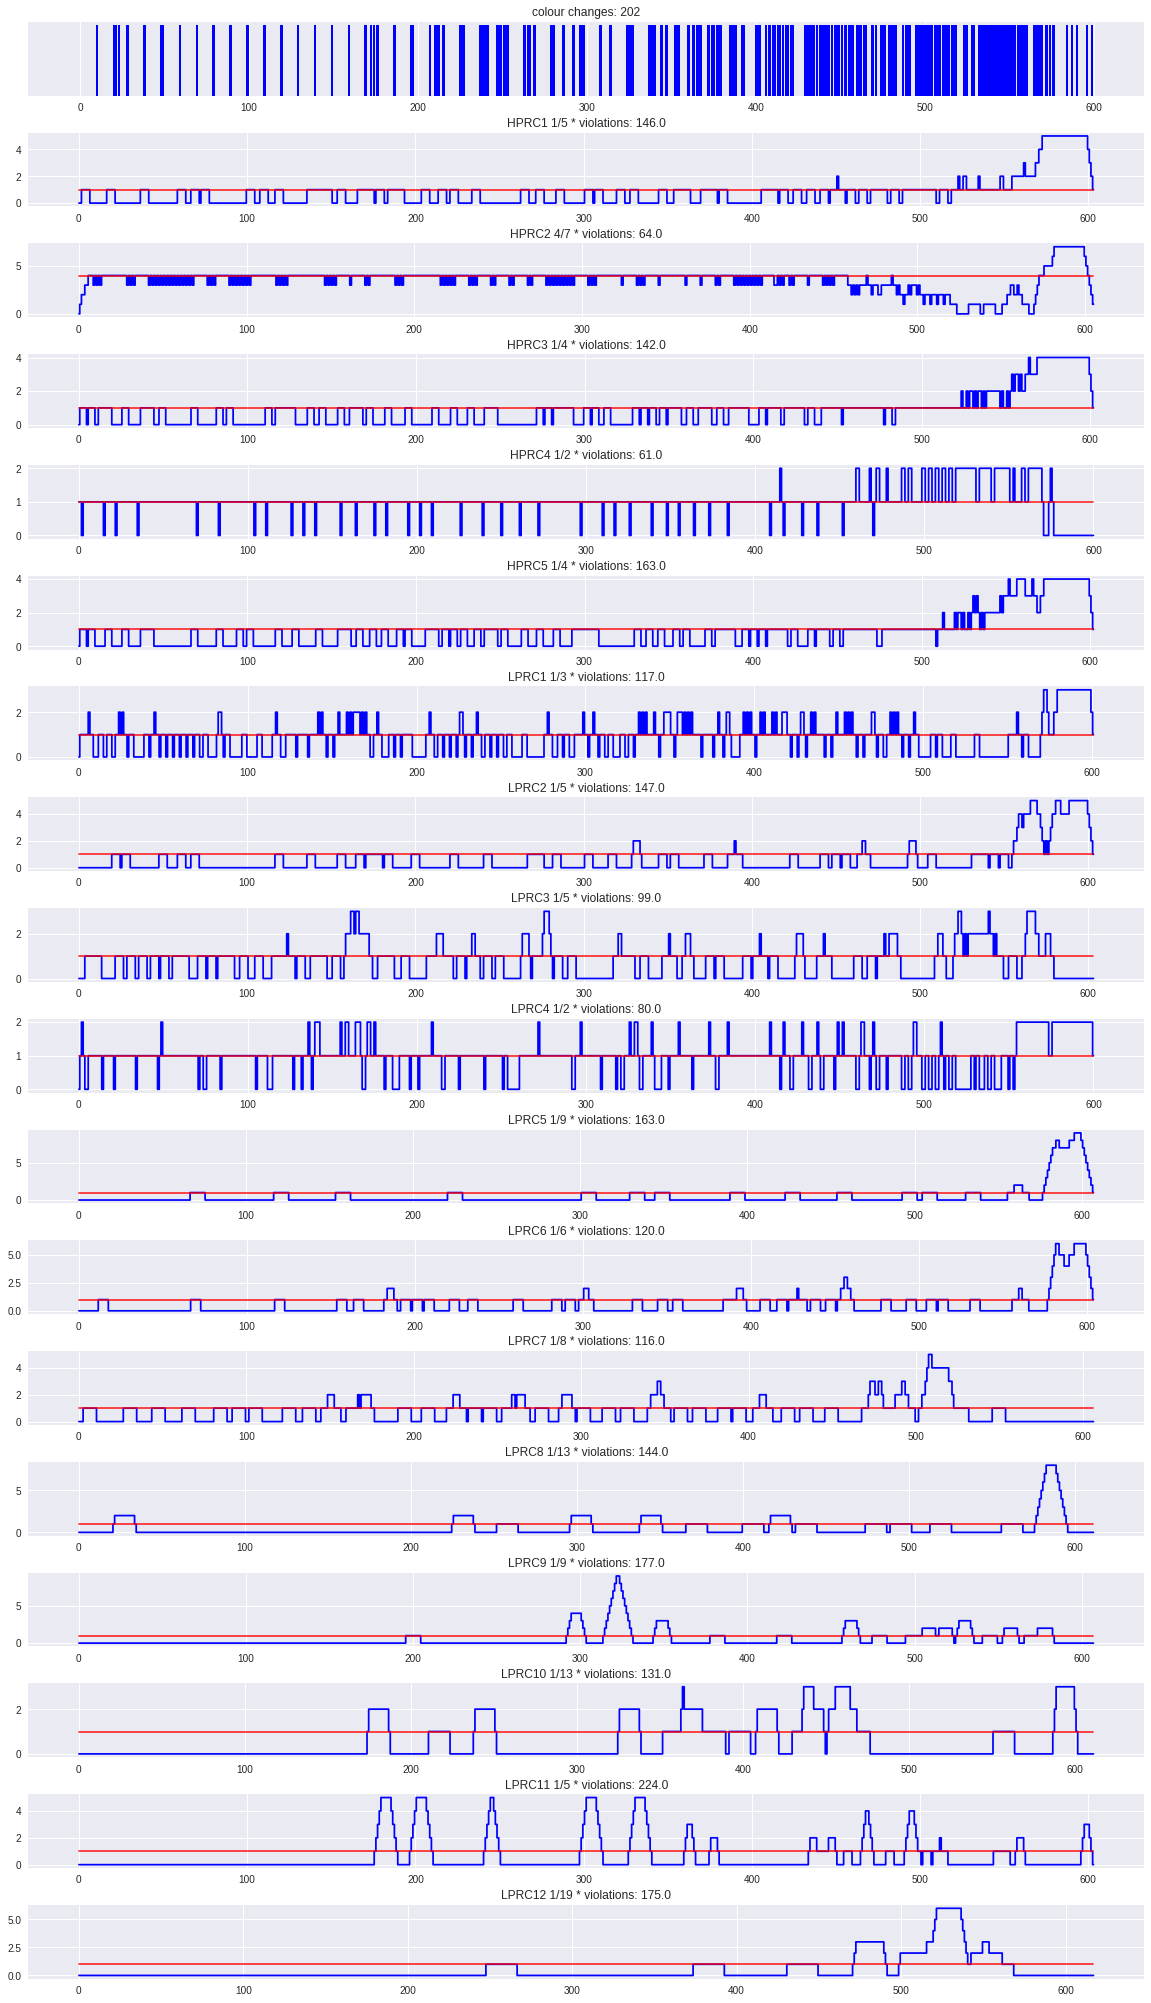

In [17]:
def pick_next_greedily(partial_schedule,remaining_cars,instance,tries=50):
    """finde nächstes Auto für Reihung, das Kosten nur gering erhöht"""
    best_car=None
    best_penalty_increase=np.inf
    ### Fügen Sie Ihren Code hier ein ###
    for _ in range(tries):
        car=random.choice(remaining_cars)
        ## um wie viel erhöhen sich die Kosten, wenn car als nächstes ausgesucht wird?
        increase=penalty_increase(car,partial_schedule,instance)
        ## wenn besser als bisher bestes, nimm car stattdessen
        if increase<best_penalty_increase:
            best_penalty_increase=increase
            best_car=car
    ### Ende Einfügung ###
    return best_car

## wir erfassen auch die Laufzeit:
start=time.time()
greedy_schedule=greedy(sample_instance)
end=time.time()
rnlt.check_for_completeness(greedy_schedule,sample_instance)
greedy_cost=rnlt.compute_objective(greedy_schedule,sample_instance)
print("Kosten der greedy-Lösung: {}".format(greedy_cost))
print("Laufzeit: {:.1f}s".format(end-start))
rnlt.plot_options_and_colours(greedy_schedule,sample_instance)

Um einen besseren Überblick zu erhalten, berechnen wir noch die Resultate bei allen Instanzen. Diese sollten mit denen der Zufallslösungen oben verglichen werden.

In [18]:
### Fügen Sie Ihren Code hier ein ###
results=[]
for key in data_dict.keys():
    instance=data_dict[key]
    greedy_schedule=greedy(instance)
    cost=rnlt.compute_objective(greedy_schedule,instance)
    renault=instance['renault_schedule']
    renault_cost=rnlt.compute_objective(renault,instance)
    results.append((key,cost,renault_cost))
    
for name,cost,renault_cost in results:
    print("{:23} greedy: {:13} ** Renault: {:13}".format(name,cost,renault_cost))

039_38_4_EP_RAF_ch1     greedy:  1156213000.0 ** Renault:    76228000.0
024_38_3_EP_ENP_RAF     greedy:   344995518.0 ** Renault:    80075463.0
048_39_1_EP_ENP_RAF     greedy:   524966359.0 ** Renault:    40091333.0
025_38_1_EP_ENP_RAF     greedy:   322159622.0 ** Renault:     1997290.0
064_38_2_EP_RAF_ENP_ch1 greedy:    25214793.0 ** Renault:      195786.0
064_38_2_RAF_EP_ENP_ch2 greedy:    33439131.0 ** Renault:    29178060.0
022_3_4_EP_RAF_ENP      greedy:    78052037.0 ** Renault:       69002.0
048_39_1_EP_RAF_ENP     greedy:   541222571.0 ** Renault:    35181855.0
024_38_5_EP_RAF_ENP     greedy:   328456463.0 ** Renault:    96467092.0
039_38_4_RAF_EP_ch1     greedy:    91357000.0 ** Renault:    68334000.0
024_38_3_EP_RAF_ENP     greedy:   310422973.0 ** Renault:    70362204.0
025_38_1_EP_RAF_ENP     greedy:   498269216.0 ** Renault:      291997.0
064_38_2_EP_RAF_ENP_ch2 greedy:   320037157.0 ** Renault:       45035.0
064_38_2_RAF_EP_ENP_ch1 greedy:   102530864.0 ** Renault:    634

Wir sehen: greedy ist immer noch recht weit von der Renault-Lösung entfernt.